In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시 시작

In [1]:
!pip install Konlpy > /dev/null

In [2]:
from google.colab import files
uploaded = files.upload()
textfile = list(uploaded.keys())[0]

Saving puppy_blog.txt to puppy_blog.txt


In [3]:
uploaded = files.upload()
maskfile = list(uploaded.keys())[0]

Saving puppy3.jpg to puppy3.jpg


## 한글 텍스트 전처리

In [4]:
with open(textfile) as fp:
    text = fp.read()

In [5]:
from konlpy.tag import Okt
okt = Okt()

In [6]:
tokens = okt.nouns(text)
tokens[:10]

['강아지', '전', '저', '재택근무', '집', '신랑', '저녁', '퇴근', '강아지', '일단']

In [7]:
# 영문자, 숫자 제거
import re
new_tokens = []
for token in tokens:
    gift = re.sub('[A-Za-z0-9]', '', token)   
    if gift:
        new_tokens.append(gift)

In [8]:
# 한글 폰트 사용
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

- 아래 두 과정을 반복해서 불용어 정리

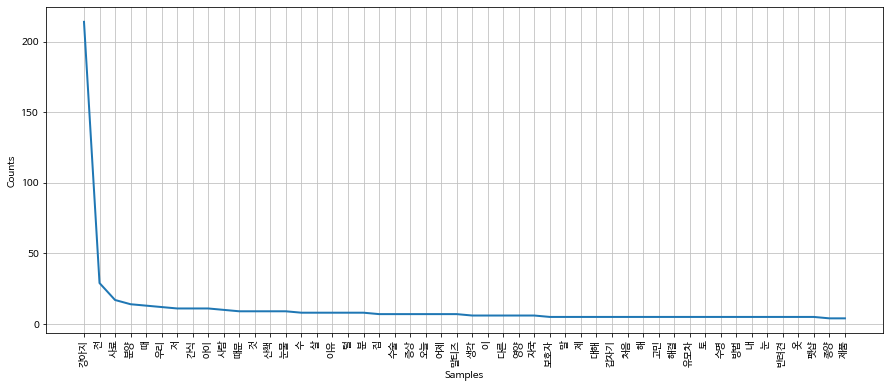

In [10]:
gift = nltk.Text(new_tokens, name='강아지')
plt.figure(figsize=(15,6))
gift.plot(50)
plt.show()

In [11]:
stoptext = """전 때 우리 저 아이 사람 때문 것 눈물 수 살 이유 분 집 증상 오늘 어제 생각 이 다른 영양
              자국 말 제 대해 갑자치 처음 해 고민 해결 유모차 토 방법 내 재택근무 신랑 퇴근 저녁 일단 
              무슨 왕따 견 니 주입 인생 신경 강사 모에 갑자기 위해 요즘 거 대한 스케일링 마이 저희 유선
              검색 경우 이상 둥둥 소개 새끼 자주 바로 뼈 모두 요 밥 여름 급 여량 독 두 후 확인 원인 평균
              모든 성분 알 기도 제품 그 안 혈뇨 정도 안 마운 팅 밥 도움 빵 이야기 생활 관리 날 것 거리
              첫 해나 고통 결정 닭 가슴 한번 는걸 시작 혈통 좀 걸 하루 보나 마지막 가지 겸 거기 그것
              쿨링 자꾸 못 고깃집 해나 하나 현관 부산 몸 얼마나 겁 사항 법 김밥 시기 센터 게 뒤 앞 사실
              거실 행위 다가 수윈 수원 부분 경력 그냥 맞이 물 아버지 꼭 일 적 뿌 계산 개월 컬 데 
              구명조끼 안 아지 녀석 헬시 관해 연구소 신비 제대로 표 예전 콕펫 콕핏 직접 아주머니 별로
              황철 방문 헛 쪼금 나유 치 다시 외부 쿤이 듬건 부노가 사업 사격 할머니 헛 햇 만 둘째
              첫째 그대로 동양 농양 돼지 포함 만점 분과 모모 전 분 때 갑자기 

"""
stop_words = stoptext.split() 
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['강아지', '강아지', '보호자', '강아지', '눈치', '강아지', '방치', '강아지', '입양', '사랑']

## 워드 클라우드 그리기

In [12]:
from wordcloud import WordCloud
from PIL import Image

In [13]:
data = gift.vocab().most_common(300)
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(
        font_path=path, relative_scaling=0.2,
        background_color='white'
).generate_from_frequencies(dict(data))

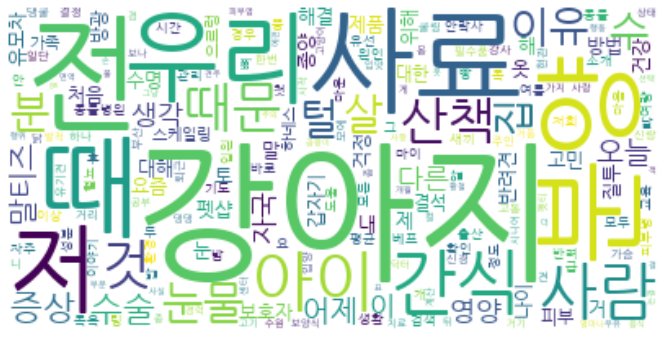

In [14]:
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- 강아지 그림에 표시하기

In [15]:
mask = np.array(Image.open(maskfile))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

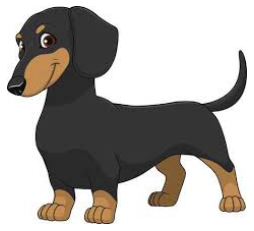

In [16]:
mask = np.array(Image.open(maskfile))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
wc = WordCloud(
        font_path=path, relative_scaling=0.2,
        background_color='white', mask=mask,
        min_font_size=1, max_font_size=120
).generate_from_frequencies(dict(data))

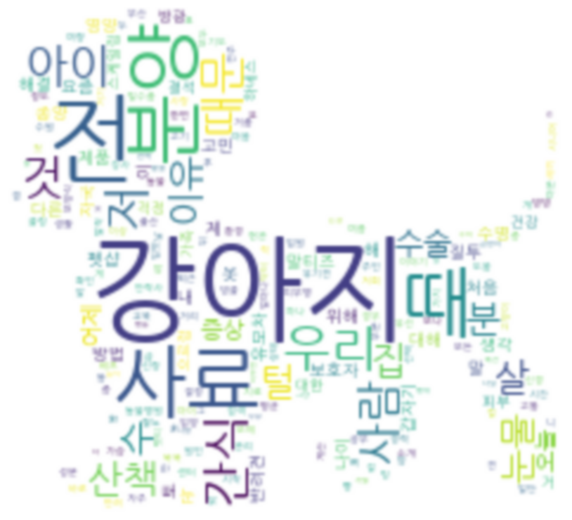

In [18]:
plt.figure(figsize=(10,10))
plt.imshow(wc, 
           interpolation='bicubic')
plt.axis('off')
plt.show()

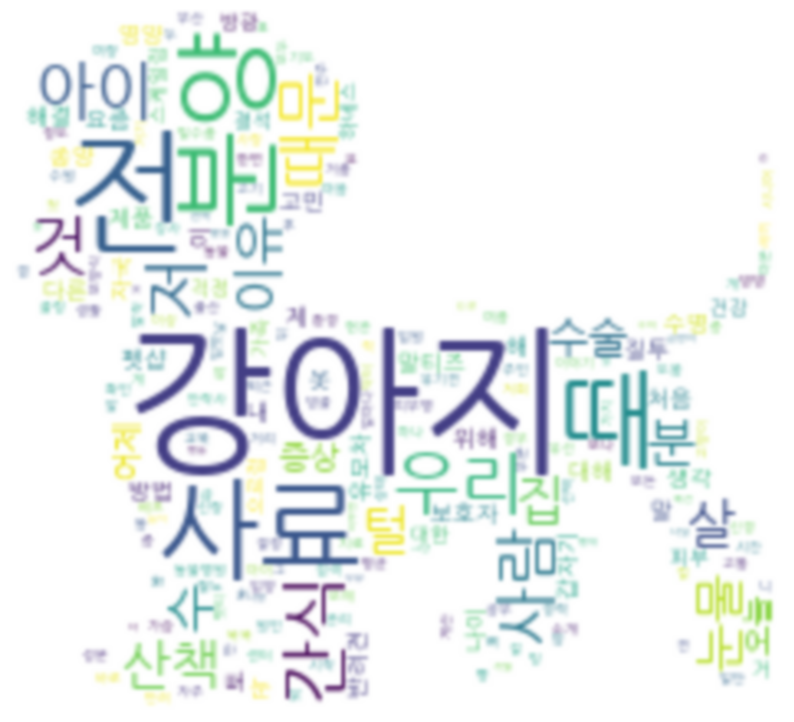

In [19]:
plt.figure(figsize=(10,10), dpi = 100)
plt.imshow(wc, 
           interpolation='bicubic')
plt.axis('off')
plt.savefig('wordcloud.png')